a = 0.1


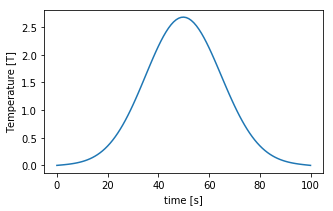

NUMPY time 0.5676776995021426 seconds


In [1]:
#EXPLICIT VERSION
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

ti=time.clock()

x0 = np.zeros(101)
x0[50] = 100
xn = np.zeros(101)
un = np.arange(101)


L=100
dx=1
Nt=1000
dt=0.01
D=10

a=(D*dt/dx/dx)

print("a =",a)

for t in range (1,Nt):
    for i in range (1,L):
        xn[i] = x0[i] + a*(x0[i-1] + x0[i+1] - 2*x0[i])
        xn[0]=0
        xn[L]=0
        x0[i]=xn[i]
                
plt.figure(figsize=(5,3))
plt.plot(un,xn)
plt.xlabel('time [s]')
plt.ylabel('Temperature [T]')
#plt.axis([0,100,0,1])
#plt.axis().set_aspect('equal', 'datal.im')
plt.show()

print('NUMPY time', time.clock()-ti, 'seconds')

[[ 1.2 -0.1  0.  ...,  0.   0.   0. ]
 [-0.1  1.2 -0.1 ...,  0.   0.   0. ]
 [ 0.  -0.1  1.2 ...,  0.   0.   0. ]
 ..., 
 [ 0.   0.   0.  ...,  1.2 -0.1  0. ]
 [ 0.   0.   0.  ..., -0.1  1.2 -0.1]
 [ 0.   0.   0.  ...,  0.  -0.1  1.2]]
a = 0.1


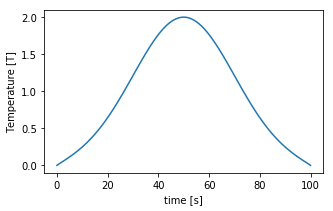

NUMPY time 6.274365477023985 seconds


In [2]:
#IMPLICIT VERSION
#building the matrix

m=101      #size of matrix
A = np.zeros((m, m))

A[0,0] = 1+2*a
A[0,1] = -a

for i in range (1,m-1):
    A[i,i+1]=A[0,1]
    A[i,i-1]=A[0,1]
    A[i,i]  =A[0,0]
    
A[m-1,m-1] = A[0,0]
A[m-1,m-2] = A[0,1]

print(A)

#building the vector x0 under the same settings as in explicit case

x0 = np.zeros((m, 1))
x0[50,0] = 100
xn = np.zeros((m, 1))

print("a =",a)

for t in range (1,Nt):
    x1 = np.linalg.solve(A, x0)   #solving the matrix equation Ax(t+dt)=x(t)
    for i in range (1,L):
        xn[i,0] = x1[i,0] + a*(x1[i-1,0] + x1[i+1,0] - 2*x1[i,0])
        xn[0,0]=0   #boundary 1
        xn[L,0]=0   #boundary 2
        x0[i,0]=xn[i,0]
  
un = np.zeros((m,1))
for k in range (1,101):
    un[k,0] = k
    
plt.figure(figsize=(5,3))
plt.plot(un,xn)
plt.xlabel('time [s]')
plt.ylabel('Temperature [T]')
#plt.axis([0,100,0,1])
#plt.axis().set_aspect('equal', 'datal.im')
plt.show()

print('NUMPY time', time.clock()-ti, 'seconds')